# Introduction

Here I'm testing a DQN on the cartpole environment. I'm using 

1. Experience replay
2. A target network, with soft updates (see agent.py for details)


### Train

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (10, 9.0)
(episode, score) = (20, 16.0)
(episode, score) = (30, 9.0)
(episode, score) = (40, 12.0)
(episode, score) = (50, 14.0)
(episode, score) = (60, 10.0)
(episode, score) = (70, 9.0)
(episode, score) = (80, 16.0)
(episode, score) = (90, 44.0)
(episode, score) = (100, 85.0)
(episode, score) = (110, 200.0)
(episode, score) = (120, 200.0)
(episode, score) = (130, 200.0)
(episode, score) = (140, 200.0)
(episode, score) = (150, 199.0)
(episode, score) = (160, 200.0)
(episode, score) = (170, 200.0)
(episode, score) = (180, 200.0)
(episode, score) = (190, 200.0)
solved after 96 episodes


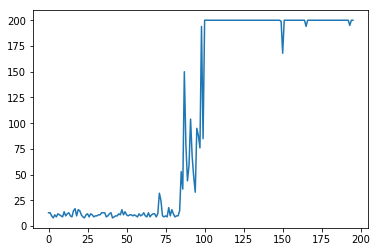

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('CartPole-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent -- note, some hyperparameters are defined in the agent.py files
lr,gamma = 0.001, 0.99
agent = Agent(num_states, num_actions, lr, gamma)
agent.epsilon = 0.5
agent.tau = 0.1
decay_factor = 0.99
epsilon_min = 0.01
learning_start = 500   #collect this many experience before learning


#Train
EPISODES = 5000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        # env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.replay()                       #update the behavior model
            agent.soft_update_target_network()   #update the target model

        #iterate
        if done:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 10 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
    
    #Solved condition
    if len(scores) >= 100:
        if np.mean(scores[-100:]) >= 195.0:
            print ' \ Solved after ' + str(e-100) + ' episodes'
            break

plt.plot(scores)

### Watch a smart agent

In [5]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    state = next_state
env.close()

### Record a smart agent

There is a handy way to do this within openai using the Monitor environemnt

In [10]:
env = gym.make('CartPole-v0')
env = gym.wrappers.Monitor(env, 'movies/', video_callable=lambda episode_id: True)
env.seed(1)  # for comparison

state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    state = next_state
env.close()